In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
train = '/content/drive/My Drive/gujarat/Training.csv'
test = '/content/drive/My Drive/gujarat/Testing.csv'

with open(train, 'r') as file:
    train_data = pd.read_csv(file)

with open(test, 'r') as file:
    test_data = pd.read_csv(file)


In [5]:
#instantiating the LabelEncoder class
label_encoder = LabelEncoder()

diseases = label_encoder.fit_transform(train_data['prognosis'])
disease_names = label_encoder.classes_

#encoding the disease name with their corresponding number for training
train_data['prognosis'] = diseases
test_data['prognosis'] = label_encoder.fit_transform(test_data['prognosis'])


In [6]:
trainx = train_data.drop(['prognosis','Unnamed: 133'],axis=1)
trainy = train_data['prognosis']

trainx,valx,trainy,valy = train_test_split(trainx,trainy,test_size=0.2)

testx = test_data.drop(['prognosis'],axis=1)
testy = test_data['prognosis']

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

trainx = scaler.fit_transform(trainx)
valx = scaler.fit_transform(valx)
testx = scaler.fit_transform(testx)

In [8]:
#creating a multi classifier neural network

from keras.layers import Dense,Flatten,Dropout,BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping

predictor = Sequential([
    Dense(256, input_dim=132, activation='relu', kernel_regularizer='l2'),

    #hidden layers
    Dense(128, activation='relu',kernel_regularizer='l2'),
    BatchNormalization(),

    Dense(64, activation='relu',kernel_regularizer='l2'),
    BatchNormalization(),

    Dense(64, activation='relu',kernel_regularizer='l2'),
    BatchNormalization(),

    #output layer
    Dense(42, activation='softmax'),
])

early_stopper = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

predictor.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

predictor.fit(trainx,trainy,validation_data=(valx,valy),epochs=100,callbacks=[early_stopper])

Epoch 1/100
123/123 [==============================] - 3s 6ms/step - loss: 4.7381 - accuracy: 0.9355 - val_loss: 5.0309 - val_accuracy: 1.0000
Epoch 2/100
123/123 [==============================] - 0s 4ms/step - loss: 2.5589 - accuracy: 1.0000 - val_loss: 3.3826 - val_accuracy: 0.9715
Epoch 3/100
123/123 [==============================] - 0s 4ms/step - loss: 1.3755 - accuracy: 0.9985 - val_loss: 2.3819 - val_accuracy: 0.9380
Epoch 4/100
123/123 [==============================] - 0s 4ms/step - loss: 0.7119 - accuracy: 0.9997 - val_loss: 1.6571 - val_accuracy: 0.9746
Epoch 5/100
123/123 [==============================] - 0s 3ms/step - loss: 0.3402 - accuracy: 1.0000 - val_loss: 1.8032 - val_accuracy: 0.9167
Epoch 6/100
123/123 [==============================] - 0s 4ms/step - loss: 0.1575 - accuracy: 1.0000 - val_loss: 1.7463 - val_accuracy: 0.9624
Epoch 7/100
123/123 [==============================] - 0s 3ms/step - loss: 0.2352 - accuracy: 0.9929 - val_loss: 0.2326 - val_accuracy: 1.0000

In [13]:
#testing the performance of model through various testcases

sequence = [
    0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
    1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
    0, 1, 0, 1, 1, 0, 0, 0, 0,0,0,0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
    1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0
]
arr = np.array(sequence).reshape(1,-1)

disease_code = predictor.predict(arr)
disease_code = np.argmax(disease_code,axis=1)

disease_names = label_encoder.inverse_transform(disease_code)
print(disease_names)


1/1 [==============================] - 0s 19ms/step
['Cervical spondylosis']


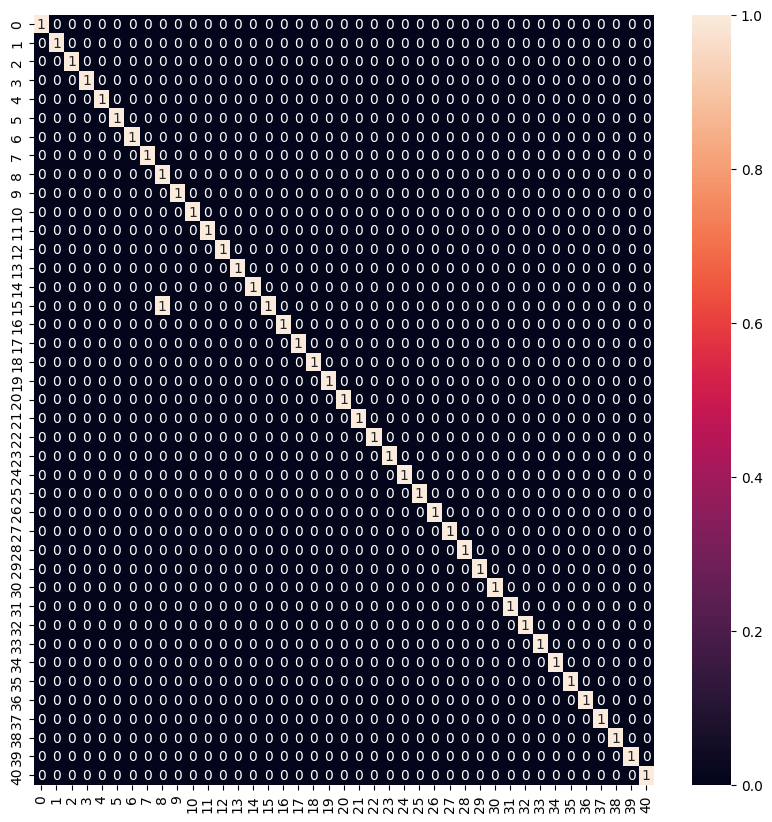

0.9761904761904762


In [ ]:
#model perfomance evaluation through heatmaps and accuracy score

from sklearn.metrics import confusion_matrix,accuracy_score as accuracy
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(testy,disease_code)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.show()

print(accuracy(testy,disease_code))